## Assignment

#### Predict presidential election voting, with two features you choose!
- Start a new notebook.
- You may reuse one of the features from the "Bread & Peace" model.
- **Acquire data for at least one new feature.** The links below may help!
- Commit your notebook to your fork of the GitHub repo.

#### Why I'm asking you to acquire data for at least one new [feature](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### You can search [FRED (Federal Reserve Bank of St. Louis)](https://fred.stlouisfed.org/) for these keywords
- real disposable income change annual
- gdp change annual
- unemployment 

#### Go to [BEA (Bureau of Economic Analysis)](https://apps.bea.gov/itable/) and follow these steps
- National Data - GDP & Personal Income
- Begin using the data
- Section 1 - DOMESTIC PRODUCT AND INCOME
- Table 1.17.1. Percent Change From Preceding Period in Real Gross Domestic Product, Real Gross Domestic Income, and Other Major NIPA Aggregates
- Modify
  - First Year: 1947
  - Last Year: 2018
  - Series: Annual
  - Refresh Table
- Download

#### Go to Wikipedia, [United States military casualties of war, Wars ranked by total number of U.S. military deaths](https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths)
- You can try this tutorial to scrape data from HTML tables: [Quick Tip: The easiest way to grab data out of a web page in Python](https://medium.com/@ageitgey/quick-tip-the-easiest-way-to-grab-data-out-of-a-web-page-in-python-7153cecfca58)

#### Read more about economic features to predict elections
- [Which Economic Indicators Best Predict Presidential Elections?](https://fivethirtyeight.blogs.nytimes.com/2011/11/18/which-economic-indicators-best-predict-presidential-elections/)
- [What stat best gets at the question, "Are you better off now than you were a year ago?"](https://www.theatlantic.com/business/archive/2010/11/the-most-important-economic-indicator-in-midterm-elections/65505/)
- [Time for change model](https://pollyvote.com/en/components/econometric-models/time-for-change-model/)


#### You can try for a "serious" model or a "spurious" model. Here are more data sources you can try
- [Tyler Vigen, Spurious Correlations, Discover a Correlation](https://tylervigen.com/discover)
- [CDC (Centers for Disease Control), Compressed Mortality data](https://wonder.cdc.gov/mortSQL.html)
- [Data Is Plural](https://tinyletter.com/data-is-plural)
- [Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/)
- [Campaign Finance Institute, Historical Stats](http://www.cfinst.org/data/historicalstats.aspx)
- Or find your own data and features to try!





### Datasets
1. Car registration: Passenger cars for the European Union
2. Ted Spread

In [35]:
import pandas as pd
import numpy as np

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [2]:
car_reg = pd.read_csv('car_registration_europe.csv')

In [3]:
ted = pd.read_csv('ted_rate.csv')

In [10]:
votes.shape

(17, 4)

### Wrangling

In [9]:
# since election day is early nov. we'll take the average of the last three months of car registration and ted rate 

In [19]:
car_reg['DATE'] = pd.to_datetime(car_reg['DATE'])
ted['DATE'] = pd.to_datetime(ted['DATE'])

In [43]:
ted['TEDRATE'] = ted['TEDRATE'].replace('.', np.nan)
ted['TEDRATE'] = pd.to_numeric(ted['TEDRATE'])

In [45]:
car_reg['percent_change'] = pd.to_numeric(car_reg['EU28SLRTCR03GPSAM'])
car_reg = car_reg.drop('EU28SLRTCR03GPSAM',axis=1)

In [95]:
grouped = ted.groupby(by=[ted['DATE'].dt.year,ted['DATE'].dt.month]).mean()

In [97]:
g = pd.merge(grouped.xs(8,level=1),grouped.xs(9,level=1),left_index=True,right_index=True)

In [98]:
g = pd.merge(g,grouped.xs(10,level=1),left_index=True,right_index=True)

In [103]:
g = g.mean(axis=1)

In [123]:
ted = pd.DataFrame(g).reset_index()

In [126]:
car_reg = car_reg.groupby(by=car_reg['DATE'].dt.year).mean().reset_index()

In [131]:
df = pd.merge(ted,car_reg,on='DATE')

In [136]:
df.columns = ['date','ted','percent_change']

In [142]:
df = df.loc[df['date'].isin(votes['Year'])]

In [146]:
votes = votes.loc[votes['Year'] >= 1988]

In [150]:
df = df.merge(votes,left_on='date',right_on='Year')

In [151]:
df

,date,ted,percent_change,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share
0,1988,1.334369,0.446077,1988,"Bush, Sr.",Dukakis,53.94
1,1992,0.426294,2.206280,1992,"Bush, Sr.",Clinton,46.55
2,1996,0.522999,0.239385,1996,Clinton,Dole,54.74
3,2000,0.648864,0.207673,2000,Gore,"Bush, Jr.",50.27
4,2004,0.277349,0.452830,2004,"Bush, Jr.",Kerry,51.24
5,2008,2.145869,-2.234876,2008,McCain,Obama,46.32
6,2012,0.277752,-1.218556,2012,Obama,Romney,52.00
7,2016,0.542334,0.495963,2016,Clinton,Trump,48.20


In [152]:
X = df[['ted','percent_change']]

In [153]:
y = df['Incumbent Party Vote Share']

## Predicting

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [157]:
model = LinearRegression()

In [158]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
y_pred = model.predict(X)

In [160]:
y_pred

array([49.11294104, 50.00125869, 50.81277993, 50.58156629, 51.18686652,
       48.88328618, 52.03717449, 50.64412687])

In [194]:
error = mean_absolute_error(y,y_pred)

## Graphing

In [163]:
import matplotlib.pyplot as plt

In [172]:
df['y_pred'] = y_pred

In [173]:
df.head()

,date,ted,percent_change,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,y_pred
0,1988,1.334369,0.446077,1988,"Bush, Sr.",Dukakis,53.94,49.112941
1,1992,0.426294,2.206280,1992,"Bush, Sr.",Clinton,46.55,50.001259
2,1996,0.522999,0.239385,1996,Clinton,Dole,54.74,50.812780
3,2000,0.648864,0.207673,2000,Gore,"Bush, Jr.",50.27,50.581566
4,2004,0.277349,0.452830,2004,"Bush, Jr.",Kerry,51.24,51.186867


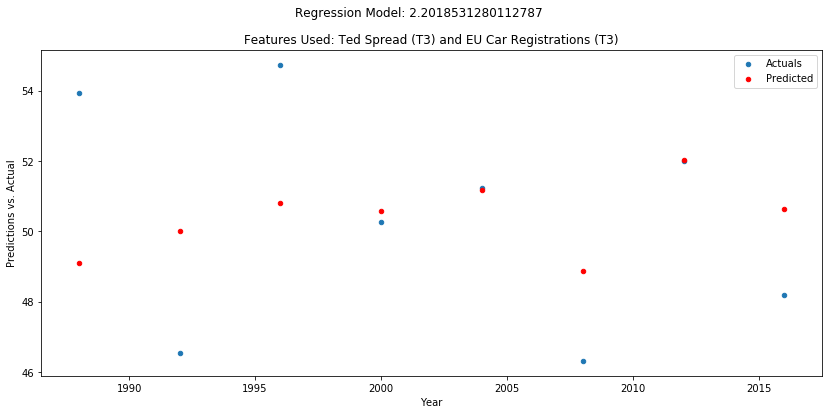

In [195]:
ax = df.plot(x='date',y='Incumbent Party Vote Share',kind='scatter',figsize=(14,6))
df.plot(x='date',y='y_pred',kind='scatter',ax=ax,color='red')
plt.legend(['Actuals','Predicted'])
plt.title('Features Used: Ted Spread (T3) and EU Car Registrations (T3)')
plt.suptitle('Regression Model: {}'.format(error))
plt.xlabel('Year')
plt.ylabel('Predictions vs. Actual');
